### Anomaly detection using autoencoders

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
df_stats_Ch1_test2 = pd.read_csv("../DataStatistics/estadisticos_test2_ch1.csv" , sep = ',')
X_Ch1 = df_stats_Ch1_test2[['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']].values

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Ch1)
X_Ch1 = scaler.transform(X_Ch1)

In [4]:
X_Ch1_primerCuarto = X_Ch1[:int(len(X_Ch1)/4)]

In [5]:
encoder = keras.Sequential(name='encoder')
encoder.add(layers.Dense(units=10, activation = 'relu'))
encoder.add(layers.Dense(units=10, activation = 'relu'))
encoder.add(layers.Dense(units=5, activation = 'relu'))

decoder = keras.Sequential(name='decoder')
decoder.add(layers.Dense(units=5, activation = 'relu'))
decoder.add(layers.Dense(units=10, activation = 'relu'))
decoder.add(layers.Dense(units=10, activation = 'tanh'))

autoencoder = keras.Sequential([encoder, decoder])

In [6]:
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")

In [7]:
from numpy.random import seed
seed(1)

In [8]:
history = autoencoder.fit(
    X_Ch1_primerCuarto,
    X_Ch1_primerCuarto,
    epochs=1000,
    batch_size=128,
    validation_split=0.1
    #callbacks=[
     #   keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, mode="min")
    #],
)

Epoch 1/1000
2/2 [==============================] - 0s 116ms/step - loss: 0.3721 - val_loss: 0.3535
Epoch 2/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.3658 - val_loss: 0.3474
Epoch 3/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.3602 - val_loss: 0.3423
Epoch 4/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.3553 - val_loss: 0.3373
Epoch 5/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.3503 - val_loss: 0.3322
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.3455 - val_loss: 0.3270
Epoch 7/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.3403 - val_loss: 0.3217
Epoch 8/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.3353 - val_loss: 0.3162
Epoch 9/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.3298 - val_loss: 0.3107
Epoch 10/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.3246 - val_loss: 0.3051
Epoch 11/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0708 - val_loss: 0.0558
Epoch 84/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0695 - val_loss: 0.0547
Epoch 85/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0682 - val_loss: 0.0537
Epoch 86/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0671 - val_loss: 0.0528
Epoch 87/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0661 - val_loss: 0.0519
Epoch 88/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0651 - val_loss: 0.0511
Epoch 89/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0642 - val_loss: 0.0504
Epoch 90/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0633 - val_loss: 0.0497
Epoch 91/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0624 - val_loss: 0.0491
Epoch 92/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.0616 - val_loss: 0.0485
Epoch 93/1000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0483 - val_loss: 0.0386
Epoch 166/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0482 - val_loss: 0.0386
Epoch 167/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0482 - val_loss: 0.0386
Epoch 168/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0481 - val_loss: 0.0386
Epoch 169/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0481 - val_loss: 0.0386
Epoch 170/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0481 - val_loss: 0.0385
Epoch 171/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0480 - val_loss: 0.0385
Epoch 172/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0480 - val_loss: 0.0384
Epoch 173/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0480 - val_loss: 0.0384
Epoch 174/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0479 - val_loss: 0.0384
Epoch 175/1000

Epoch 247/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0461 - val_loss: 0.0370
Epoch 248/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0461 - val_loss: 0.0370
Epoch 249/1000
2/2 [==============================] - ETA: 0s - loss: 0.035 - 0s 8ms/step - loss: 0.0461 - val_loss: 0.0370
Epoch 250/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0461 - val_loss: 0.0370
Epoch 251/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0460 - val_loss: 0.0370
Epoch 252/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0460 - val_loss: 0.0370
Epoch 253/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0460 - val_loss: 0.0370
Epoch 254/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0460 - val_loss: 0.0370
Epoch 255/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0460 - val_loss: 0.0370
Epoch 256/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.

2/2 [==============================] - 0s 8ms/step - loss: 0.0446 - val_loss: 0.0362
Epoch 329/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0445 - val_loss: 0.0362
Epoch 330/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0445 - val_loss: 0.0362
Epoch 331/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0445 - val_loss: 0.0362
Epoch 332/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0445 - val_loss: 0.0362
Epoch 333/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0445 - val_loss: 0.0361
Epoch 334/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0444 - val_loss: 0.0361
Epoch 335/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0444 - val_loss: 0.0362
Epoch 336/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0444 - val_loss: 0.0361
Epoch 337/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0444 - val_loss: 0.0361
Epoch 338/1000


Epoch 410/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0426 - val_loss: 0.0352
Epoch 411/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0426 - val_loss: 0.0352
Epoch 412/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0425 - val_loss: 0.0351
Epoch 413/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0425 - val_loss: 0.0352
Epoch 414/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0425 - val_loss: 0.0352
Epoch 415/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0424 - val_loss: 0.0352
Epoch 416/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0424 - val_loss: 0.0351
Epoch 417/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0424 - val_loss: 0.0352
Epoch 418/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0424 - val_loss: 0.0351
Epoch 419/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0423 - val_loss: 0.0350


Epoch 492/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0401 - val_loss: 0.0333
Epoch 493/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0400 - val_loss: 0.0333
Epoch 494/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0400 - val_loss: 0.0332
Epoch 495/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0400 - val_loss: 0.0332
Epoch 496/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0399 - val_loss: 0.0332
Epoch 497/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0399 - val_loss: 0.0332
Epoch 498/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0399 - val_loss: 0.0332
Epoch 499/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0398 - val_loss: 0.0332
Epoch 500/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0398 - val_loss: 0.0332
Epoch 501/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0398 - val_loss: 0.0331


2/2 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.0322
Epoch 574/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0379 - val_loss: 0.0321
Epoch 575/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0379 - val_loss: 0.0322
Epoch 576/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0379 - val_loss: 0.0321
Epoch 577/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0378 - val_loss: 0.0321
Epoch 578/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0378 - val_loss: 0.0321
Epoch 579/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0378 - val_loss: 0.0320
Epoch 580/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0377 - val_loss: 0.0320
Epoch 581/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0377 - val_loss: 0.0321
Epoch 582/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0377 - val_loss: 0.0320
Epoch 583/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0363 - val_loss: 0.0318
Epoch 655/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0363 - val_loss: 0.0318
Epoch 656/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0363 - val_loss: 0.0318
Epoch 657/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0363 - val_loss: 0.0318
Epoch 658/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0363 - val_loss: 0.0318
Epoch 659/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0362 - val_loss: 0.0318
Epoch 660/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0362 - val_loss: 0.0318
Epoch 661/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0362 - val_loss: 0.0318
Epoch 662/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0362 - val_loss: 0.0318
Epoch 663/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0362 - val_loss: 0.0318
Epoch 664/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 737/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 738/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 739/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 740/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 741/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 742/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 743/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 744/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 745/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0360 - val_loss: 0.0318
Epoch 746/1000

2/2 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 819/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0316
Epoch 820/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 821/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 822/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 823/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 824/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 825/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 826/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 827/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0358 - val_loss: 0.0317
Epoch 828/1000


Epoch 900/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.0316
Epoch 901/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0356 - val_loss: 0.0316
Epoch 902/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0357 - val_loss: 0.0316
Epoch 903/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.0315
Epoch 904/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.0316
Epoch 905/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0356 - val_loss: 0.0316
Epoch 906/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.0315
Epoch 907/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0356 - val_loss: 0.0316
Epoch 908/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.0316
Epoch 909/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 0.0315


2/2 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 982/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 983/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 984/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 985/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 986/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 987/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 988/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 989/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 990/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0315
Epoch 991/1000


In [9]:
x_train = X_Ch1_primerCuarto
x_train_pred = autoencoder.predict(x_train)
x_train_pred

array([[ 0.35000628, -0.17480692, -0.24695596, ..., -0.5259716 ,
        -0.24781543,  0.99913836],
       [ 0.3868077 , -0.31456742, -0.31951994, ..., -0.49435195,
        -0.36288378,  0.00516775],
       [ 0.28412798, -0.18568926, -0.29336867, ..., -0.58107275,
        -0.2037016 ,  0.9999859 ],
       ...,
       [ 0.3468851 , -0.39986593, -0.4437119 , ..., -0.610753  ,
        -0.36369088,  0.92058384],
       [ 0.39271683, -0.3842552 , -0.39312315, ..., -0.54627967,
        -0.39505664, -0.22686467],
       [ 0.37656352, -0.37563044, -0.38502413, ..., -0.53825307,
        -0.38425663, -0.05728036]], dtype=float32)

In [10]:
x_test = X_Ch1
x_test_pred = autoencoder.predict(x_test)

In [11]:
error_test = np.abs(x_test - x_test_pred)
error_test
params = ['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']
error_min = error_test[:, 0]
error_max = error_test[:, 1]
error_kurt = error_test[:, 2]
error_if = error_test[:, 3]
error_rms = error_test[:, 4]
error_mf = error_test[:, 5]
error_skew = error_test[:, 6]
error_sf = error_test[:, 7]
error_ptp = error_test[:, 8]
error_cf = error_test[:, 9]

(-1.0, 12.0)

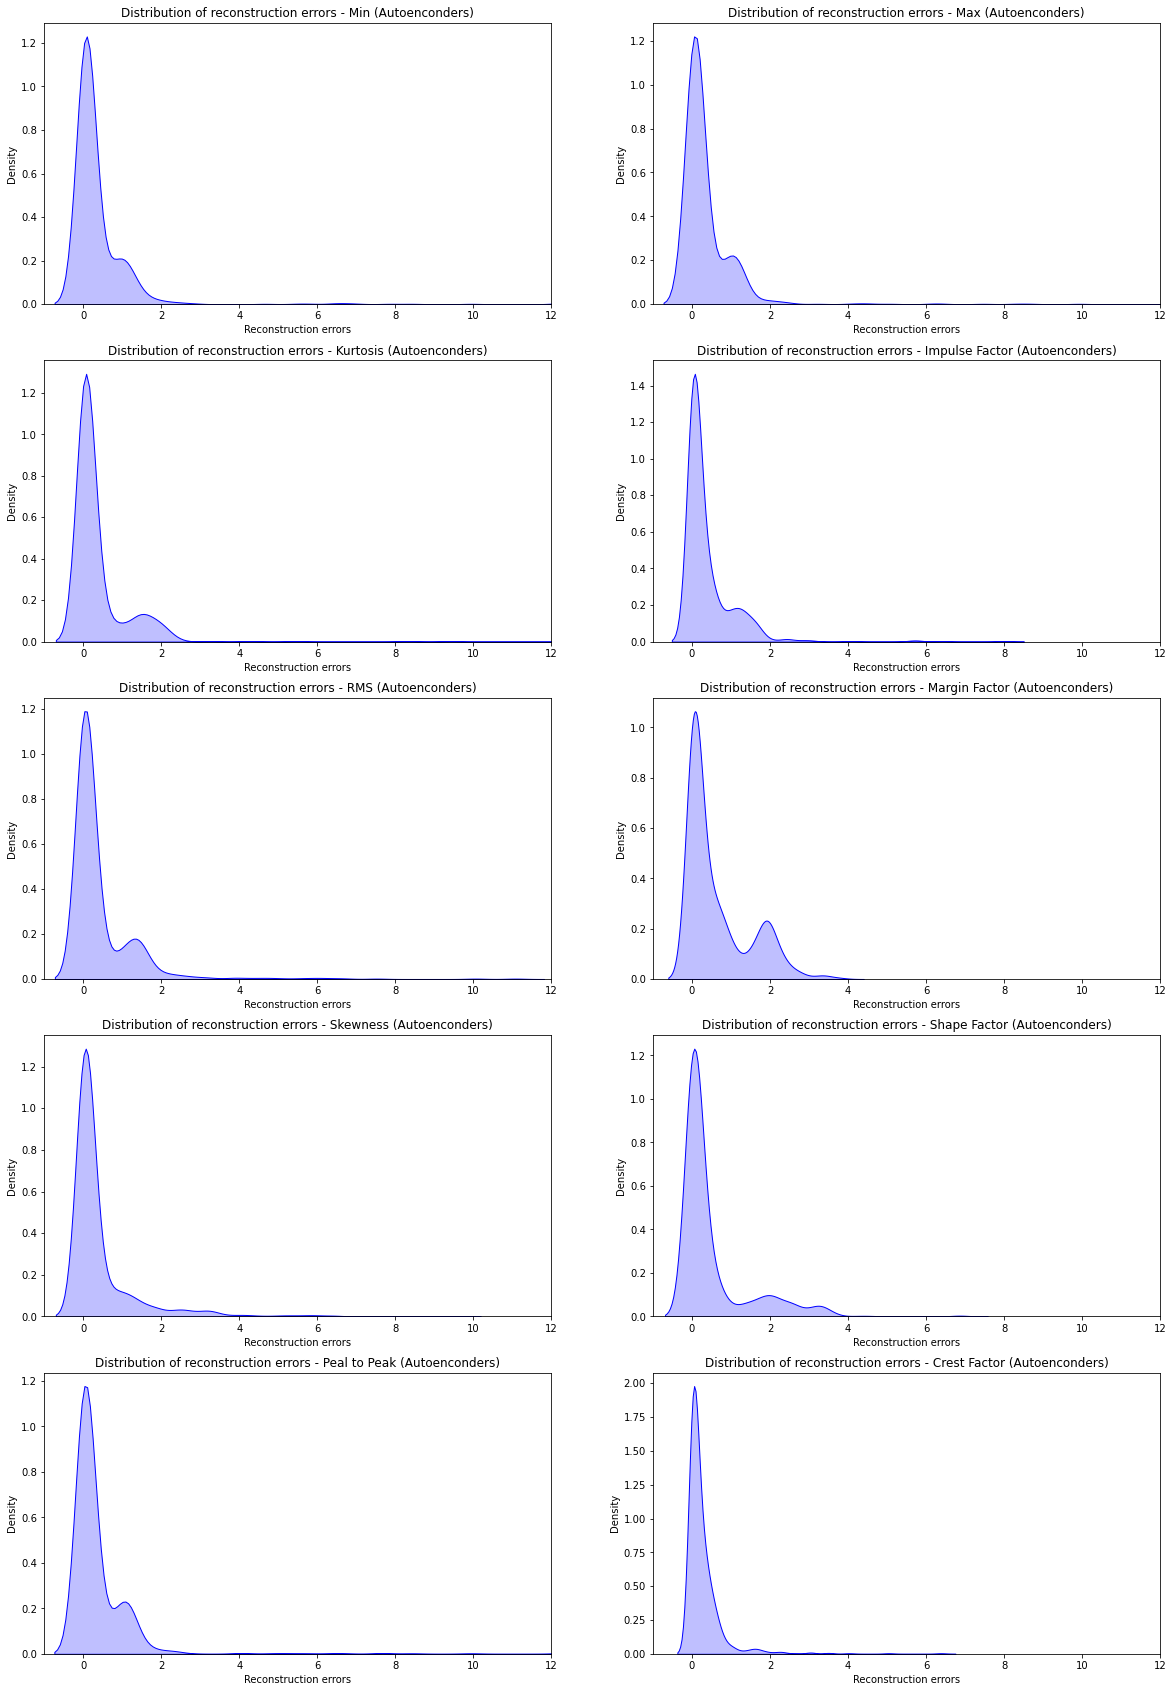

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
sns.distplot(
    error_min,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax1
)
ax1.set_title('Distribution of reconstruction errors - Min (Autoenconders)')
ax1.set_xlabel('Reconstruction errors');

sns.distplot(
    error_max,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax2
)
ax2.set_title('Distribution of reconstruction errors - Max (Autoenconders)')
ax2.set_xlabel('Reconstruction errors');

sns.distplot(
    error_kurt,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax3
)
ax3.set_title('Distribution of reconstruction errors - Kurtosis (Autoenconders)')
ax3.set_xlabel('Reconstruction errors');

sns.distplot(
    error_if,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax4
)
ax4.set_title('Distribution of reconstruction errors - Impulse Factor (Autoenconders)')
ax4.set_xlabel('Reconstruction errors');

sns.distplot(
    error_rms,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax5
)
ax5.set_title('Distribution of reconstruction errors - RMS (Autoenconders)')
ax5.set_xlabel('Reconstruction errors');

sns.distplot(
    error_mf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax6
)
ax6.set_title('Distribution of reconstruction errors - Margin Factor (Autoenconders)')
ax6.set_xlabel('Reconstruction errors');

sns.distplot(
    error_skew,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax7
)
ax7.set_title('Distribution of reconstruction errors - Skewness (Autoenconders)')
ax7.set_xlabel('Reconstruction errors');

sns.distplot(
    error_sf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax8
)
ax8.set_title('Distribution of reconstruction errors - Shape Factor (Autoenconders)')
ax8.set_xlabel('Reconstruction errors');

sns.distplot(
    error_ptp,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax9
)
ax9.set_title('Distribution of reconstruction errors - Peal to Peak (Autoenconders)')
ax9.set_xlabel('Reconstruction errors');

sns.distplot(
    error_cf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax10
)
ax10.set_title('Distribution of reconstruction errors - Crest Factor (Autoenconders)')
ax10.set_xlabel('Reconstruction errors');

ax1.set_xlim([-1, 12])
ax2.set_xlim([-1, 12])
ax3.set_xlim([-1, 12])
ax4.set_xlim([-1, 12])
ax5.set_xlim([-1, 12])
ax6.set_xlim([-1, 12])
ax7.set_xlim([-1, 12])
ax8.set_xlim([-1, 12])
ax9.set_xlim([-1, 12])
ax10.set_xlim([-1, 12])

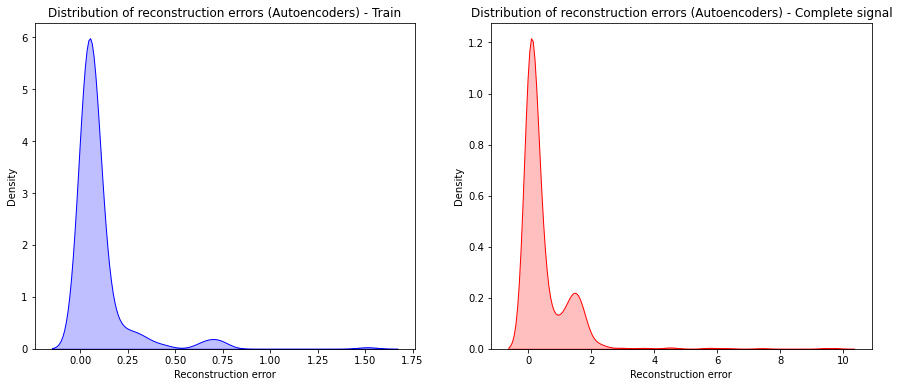

In [13]:
X_primerCuarto = X_Ch1[:int(len(X_Ch1)/4)]
# Reconstrucciopnes
reconstruccion_train = autoencoder.predict(X_primerCuarto)
reconstruccion = autoencoder.predict(X_Ch1)
    
# RMSE: 
error_reconstruccion_train = np.sqrt(((reconstruccion_train - X_primerCuarto) ** 2).mean(axis=1))
error_reconstruccion = np.sqrt(((reconstruccion - X_Ch1) ** 2).mean(axis=1))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(
    error_reconstruccion_train,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax1
)
ax1.set_title('Distribution of reconstruction errors (Autoencoders) - Train')
ax1.set_xlabel('Reconstruction error');

sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = False,
    color   = 'red',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax2
)
ax2.set_title('Distribution of reconstruction errors (Autoencoders) - Complete signal')
ax2.set_xlabel('Reconstruction error');

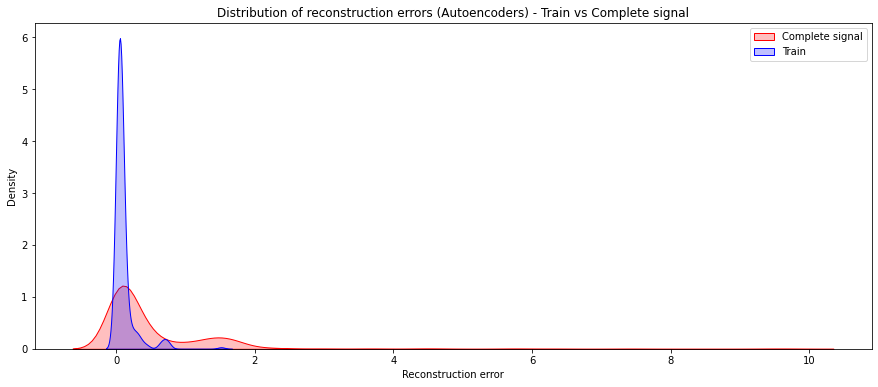

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = False,
    color   = 'red',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax,
    label = 'Complete signal'
)
sns.distplot(
    error_reconstruccion_train,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax,
    label = 'Train'
)
ax.set_title('Distribution of reconstruction errors (Autoencoders) - Train vs Complete signal')
ax.set_xlabel('Reconstruction error');
ax.legend()

In [15]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=33).fit(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
gm.means_

array([[0.14526059],
       [1.3766485 ]])

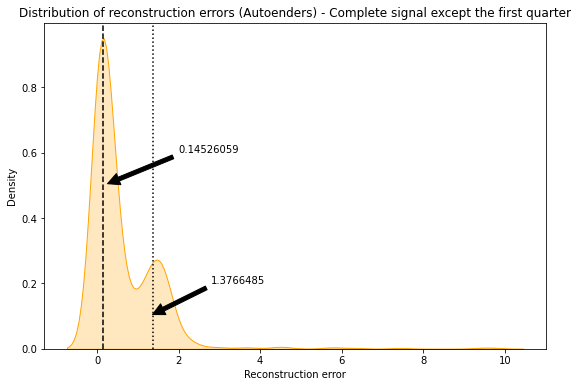

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
sns.distplot(
    error_reconstruccion[int(len(error_reconstruccion)/4):],
    hist    = False,
    rug     = False,
    color   = 'orange',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)
ax.axvline(gm.means_[0], ls = '--', color = 'black')
ax.annotate(str(round(gm.means_[0][0],8)), xy=(0.16, 0.5), xytext=(2, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.axvline(gm.means_[1], ls = ':', color = 'black')
ax.annotate(str(round(gm.means_[1][0],8)), xy=(1.28, 0.1), xytext=(2.8, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_title('Distribution of reconstruction errors (Autoenders) - Complete signal except the first quarter')
ax.set_xlabel('Reconstruction error');

In [17]:
pred_GM = [0] * int(len(error_reconstruccion)/4) # El primer cuarto lo suponemos normal
pred_GM_3cuartos = gm.predict(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
for i in range(len(pred_GM_3cuartos)):
    pred_GM.append(pred_GM_3cuartos[i])
pred_GM = np.array(pred_GM)

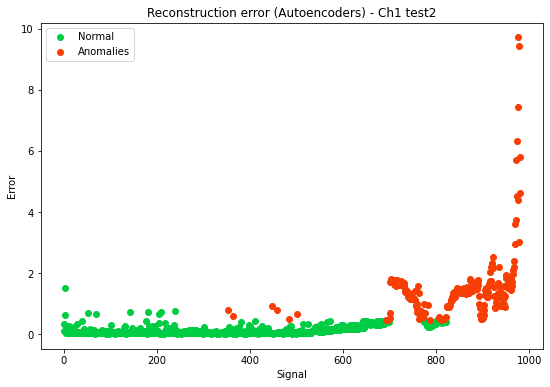

In [18]:
colores = ["#00cc44", "#f73e05"]
n_signal = list(range(len(pred_GM)))
n_signal = np.array(n_signal)
signals_0 = n_signal[pred_GM == 0]
error_rec_0 = error_reconstruccion[pred_GM == 0]
signals_1 = n_signal[pred_GM == 1]
error_rec_1 = error_reconstruccion[pred_GM == 1]
plt.figure(figsize=(9,6))
plt.scatter(signals_0, error_rec_0, c = "#00cc44", label = 'Normal')
plt.scatter(signals_1, error_rec_1, c = "#f73e05", label = 'Anomalies')
plt.title('Reconstruction error (Autoencoders) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend()

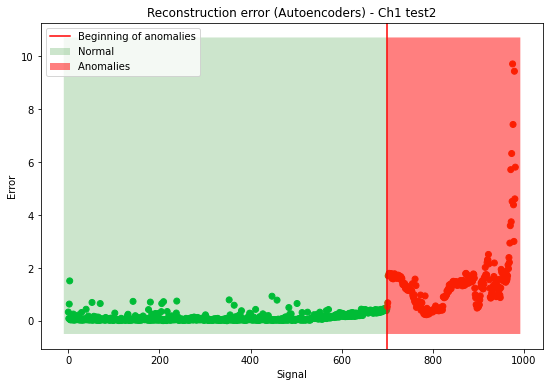

In [19]:
pred_GM = gm.predict(error_reconstruccion.reshape(-1, 1))
comienzo_1hora_anomalias = 'NA'
for i in range(len(pred_GM)):
    if pred_GM[i:i+6].all():
        comienzo_1hora_anomalias = i
        break
        
pred_GM_1hora_anomalias = [0] * comienzo_1hora_anomalias + [1] * (len(pred_GM) - comienzo_1hora_anomalias)
colores = ["#00cc44", "#f73e05"]
x = np.arange(-10, len(df_stats_Ch1_test2)+10, 0.02)
n_signal = list(range(len(pred_GM_1hora_anomalias)))
plt.figure(figsize=(9,6))
plt.scatter(n_signal, error_reconstruccion, c = np.take(colores, pred_GM_1hora_anomalias))
plt.axvline(comienzo_1hora_anomalias, color = 'r', label = 'Beginning of anomalies')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where = x < comienzo_1hora_anomalias, 
                         facecolor = 'green', alpha = 0.2, label = 'Normal')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where =  x > comienzo_1hora_anomalias, 
                         facecolor = 'red', alpha = 0.5, label = 'Anomalies ')
plt.title('Reconstruction error (Autoencoders) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend(loc = 2)

### Z-Scores

In [20]:
mean = np.mean(error_reconstruccion_train)
std = np.std(error_reconstruccion_train)
zscore = (error_reconstruccion - mean) / std

In [21]:
threshold = 3
outlier = [0] * len(error_reconstruccion_train)
for i in range(len(error_reconstruccion_train), len(error_reconstruccion)):
    z = (error_reconstruccion[i] - mean) / std
    if abs(z) > threshold:
        outlier.append(1)
    else:
        outlier.append(0)
outlier = np.array(outlier)

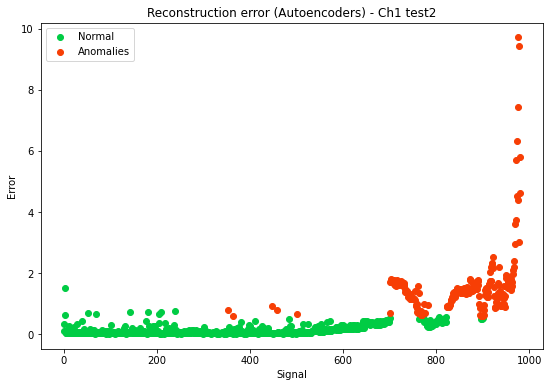

In [22]:
n_signal = list(range(len(error_reconstruccion)))
n_signal = np.array(n_signal)
signals_0 = n_signal[outlier == 0]
error_rec_0 = error_reconstruccion[outlier == 0]
signals_1 = n_signal[outlier == 1]
error_rec_1 = error_reconstruccion[outlier == 1]
plt.figure(figsize=(9,6))
plt.scatter(signals_0, error_rec_0, c = "#00cc44", label = 'Normal')
plt.scatter(signals_1, error_rec_1, c = "#f73e05", label = 'Anomalies')
plt.title('Reconstruction error (Autoencoders) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend()

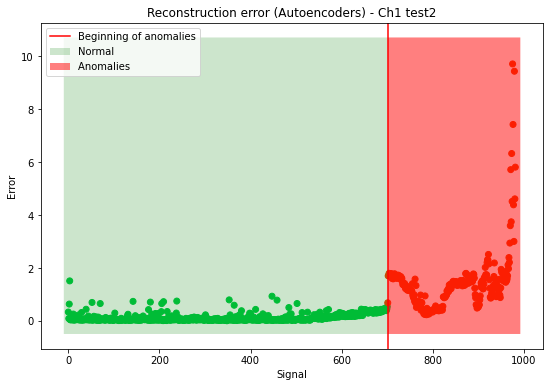

In [23]:
z = (error_reconstruccion - mean) / std
comienzo_1hora_ouliers = 'NA'
for i in range(len(error_reconstruccion_train), len(error_reconstruccion)):
    if (abs(z[i:i+6]) > threshold).all():
        comienzo_1hora_ouliers = i
        break

colores = ["#00cc44", "#f73e05"]
zscores_1hora_anomalias = [0] * comienzo_1hora_ouliers + [1] * (len(z) - comienzo_1hora_ouliers)
x = np.arange(-10, len(df_stats_Ch1_test2) + 10, 0.02)
n_signal = list(range(len(zscores_1hora_anomalias)))
plt.figure(figsize=(9,6))
plt.scatter(n_signal, error_reconstruccion, c = np.take(colores, zscores_1hora_anomalias))
plt.axvline(comienzo_1hora_ouliers, color = 'r', label = 'Beginning of anomalies')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where = x < comienzo_1hora_ouliers, 
                         facecolor = 'green', alpha = 0.2, label = 'Normal')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where =  x > comienzo_1hora_ouliers, 
                         facecolor = 'red', alpha = 0.5, label = 'Anomalies ')
plt.title('Reconstruction error (Autoencoders) - Ch1 test2')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend(loc = 2)

#### Tiempo hasta el fallo:

In [24]:
print('Comienzo de anomalías cuando se producen durante una hora')
print('GMM:', (len(error_reconstruccion) - comienzo_1hora_anomalias) * 10, ' minutos')
print('Z-Scores:', (len(error_reconstruccion) - comienzo_1hora_ouliers) * 10, ' minutos')
print('Duración total de la señal:', len(error_reconstruccion) * 10, ' minutos')

Comienzo de anomalías cuando se producen durante una hora
GMM: 2820  minutos
Z-Scores: 2810  minutos
Duración total de la señal: 9820  minutos
